In [ ]:
import IPython
IPython.display.Audio('/content/drive/MyDrive/Colab_Notebooks/Bright 5.mp3', autoplay=True)

In [ ]:
# 데이터 압축 해제
# path_to_zip_file = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1.zip'
# directory_to_extract_to = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton'

# import zipfile
# with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
#     zip_ref.extractall(directory_to_extract_to)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import pandas as pd
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import cv2
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import PIL.Image as Image
import shutil

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import sklearn
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import shutil

In [ ]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# 데이터 파악
dent_train_loc = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/dent/train/images'
dent_test_loc = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/dent/test/images'
dent_val_loc = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/dent/valid/images'
print('분석 대상 찌그러짐 train 이미지들의 개수: ', len(os.listdir(dent_train_loc)))
print('분석 대상 찌그러짐 val 이미지들의 개수: ', len(os.listdir(dent_test_loc)))
print('분석 대상 찌그러짐 test 이미지들의 개수: ', len(os.listdir(dent_val_loc)))

print('\n')

scratch_train_loc = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/scratch/train/images'
scratch_val_loc = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/scratch/valid/images'
scratch_test_loc = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/scratch/test/images'


print('분석 대상 스크래치 train 이미지들의 개수: ', len(os.listdir(scratch_train_loc)))
print('분석 대상 스크래치 val 이미지들의 개수: ', len(os.listdir(scratch_val_loc)))
print('분석 대상 스크래치 test 이미지들의 개수: ', len(os.listdir(scratch_test_loc)))

print('\n')


spacing_train_loc = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/spacing/train/images'
spacing_val_loc = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/spacing/valid/images'
spacing_test_loc = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/spacing/test/images'

print('분석 대상 스페이싱 train 이미지들의 개수: ', len(os.listdir(spacing_train_loc)))
print('분석 대상 스페이싱 val 이미지들의 개수: ', len(os.listdir(spacing_val_loc)))
print('분석 대상 스페이싱 test 이미지들의 개수: ', len(os.listdir(spacing_test_loc)))



분석 대상 찌그러짐 train 이미지들의 개수:  2130
분석 대상 찌그러짐 val 이미지들의 개수:  267
분석 대상 찌그러짐 test 이미지들의 개수:  267


분석 대상 스크래치 train 이미지들의 개수:  2130
분석 대상 스크래치 val 이미지들의 개수:  267
분석 대상 스크래치 test 이미지들의 개수:  267


분석 대상 스페이싱 train 이미지들의 개수:  1211
분석 대상 스페이싱 val 이미지들의 개수:  152
분석 대상 스페이싱 test 이미지들의 개수:  153


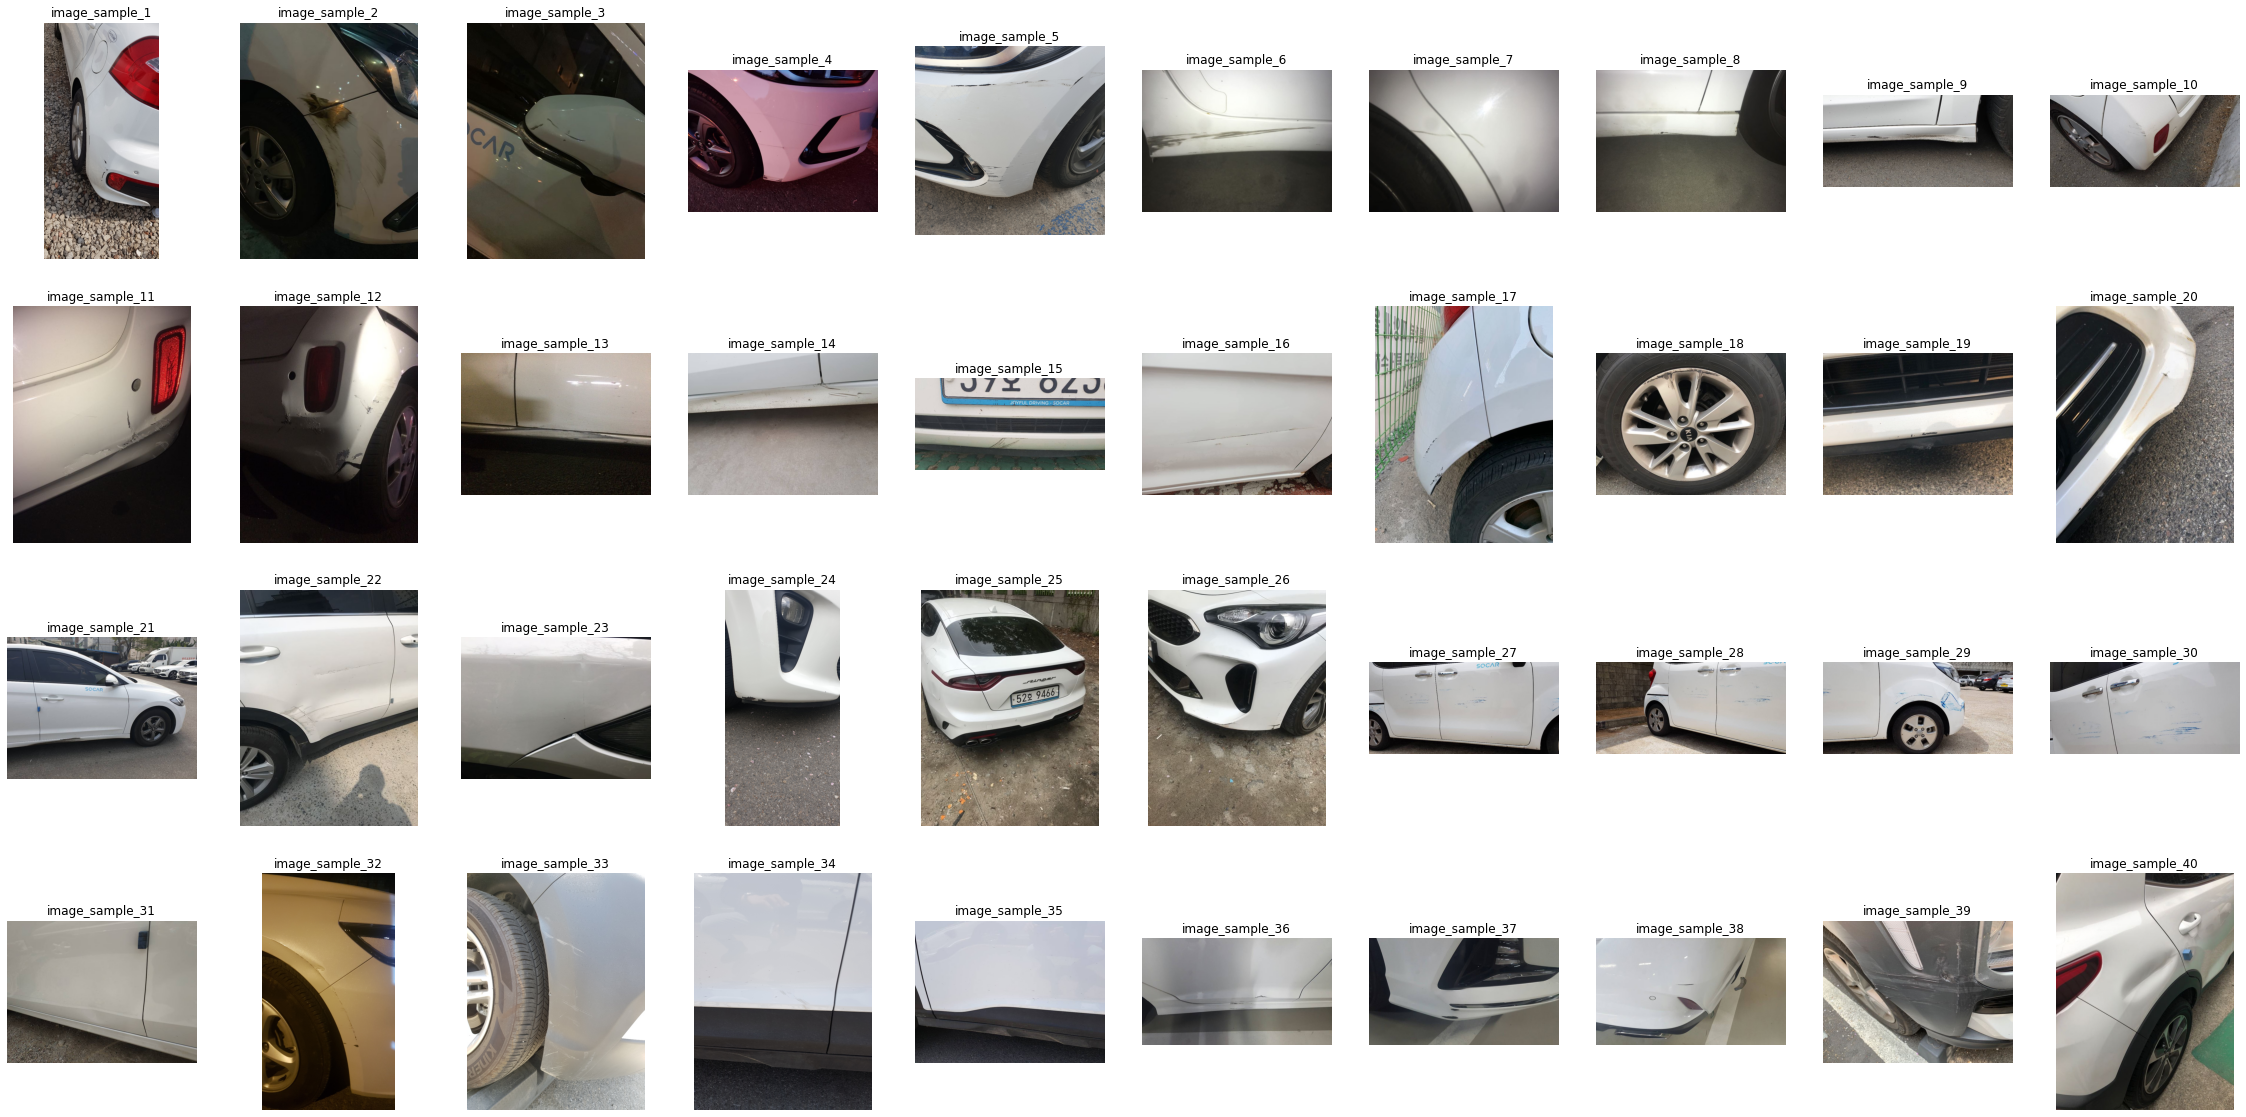

In [ ]:
fig = plt.figure(figsize=(40, 20))
columns = 10
rows = 4

target = dent_train_loc

for i in range(1, columns*rows +1):  # 샘플 10개 이미지만 골라서

    filename = os.listdir(target)[i]
    filepath = os.path.join(target, filename) # 파일 이름으로 읽고
    img = cv2.imread(filepath)[:,:,::-1] # 이미지로 읽은 후에 -> RGB 채널을 순서를 변경해주고

    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.title(f'image_sample_{i}')
    plt.imshow(img)# 이미지를 plotting 합니다
plt.show()

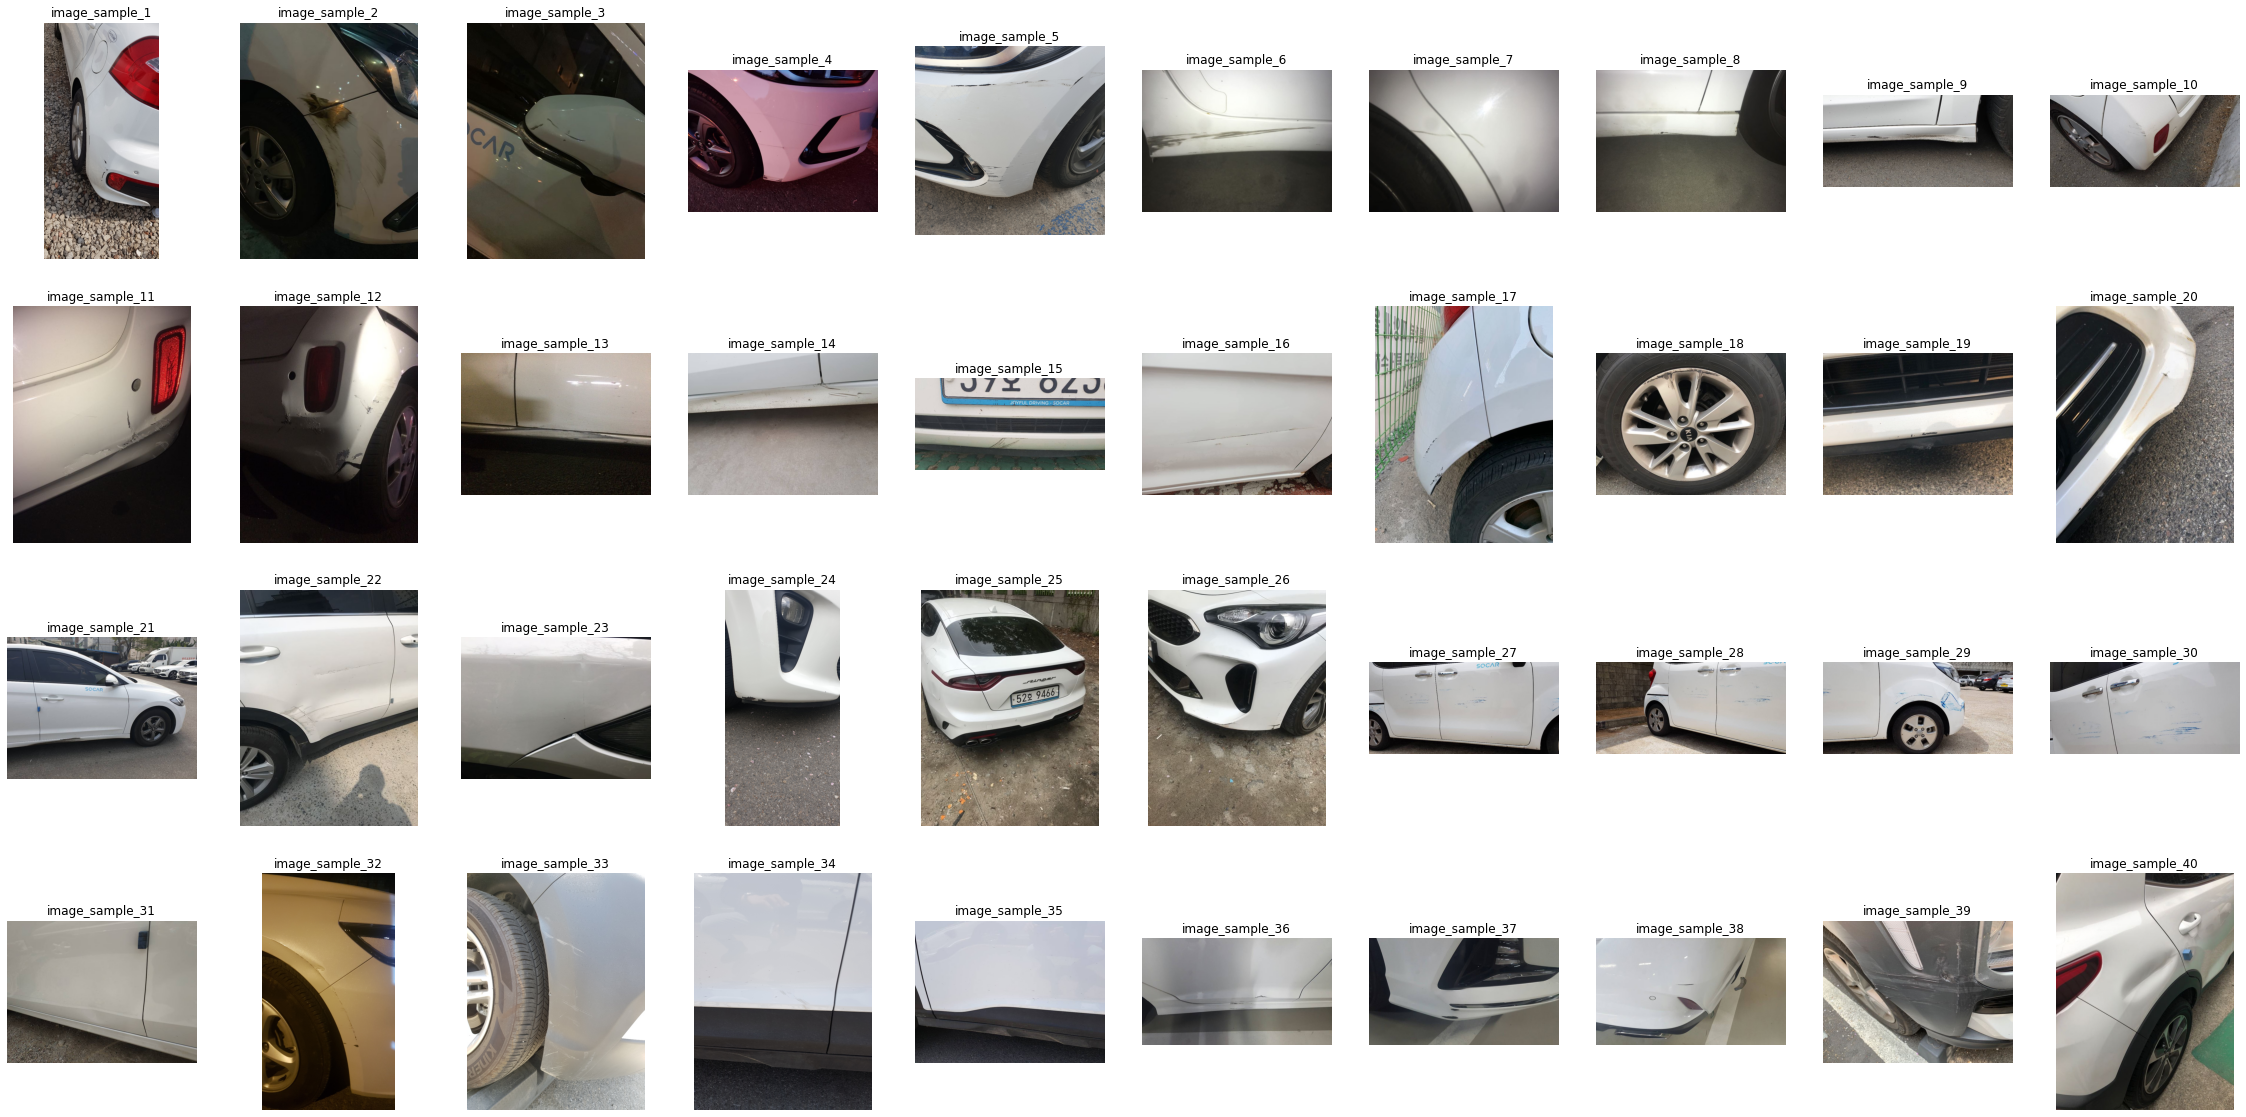

In [ ]:
fig = plt.figure(figsize=(40, 20))
columns = 10
rows = 4

target = scratch_train_loc

for i in range(1, columns*rows +1):  # 샘플 10개 이미지만 골라서

    filename = os.listdir(target)[i]
    filepath = os.path.join(target, filename) # 파일 이름으로 읽고
    img = cv2.imread(filepath)[:,:,::-1] # 이미지로 읽은 후에 -> RGB 채널을 순서를 변경해주고

    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.title(f'image_sample_{i}')
    plt.imshow(img)# 이미지를 plotting 합니다
plt.show()

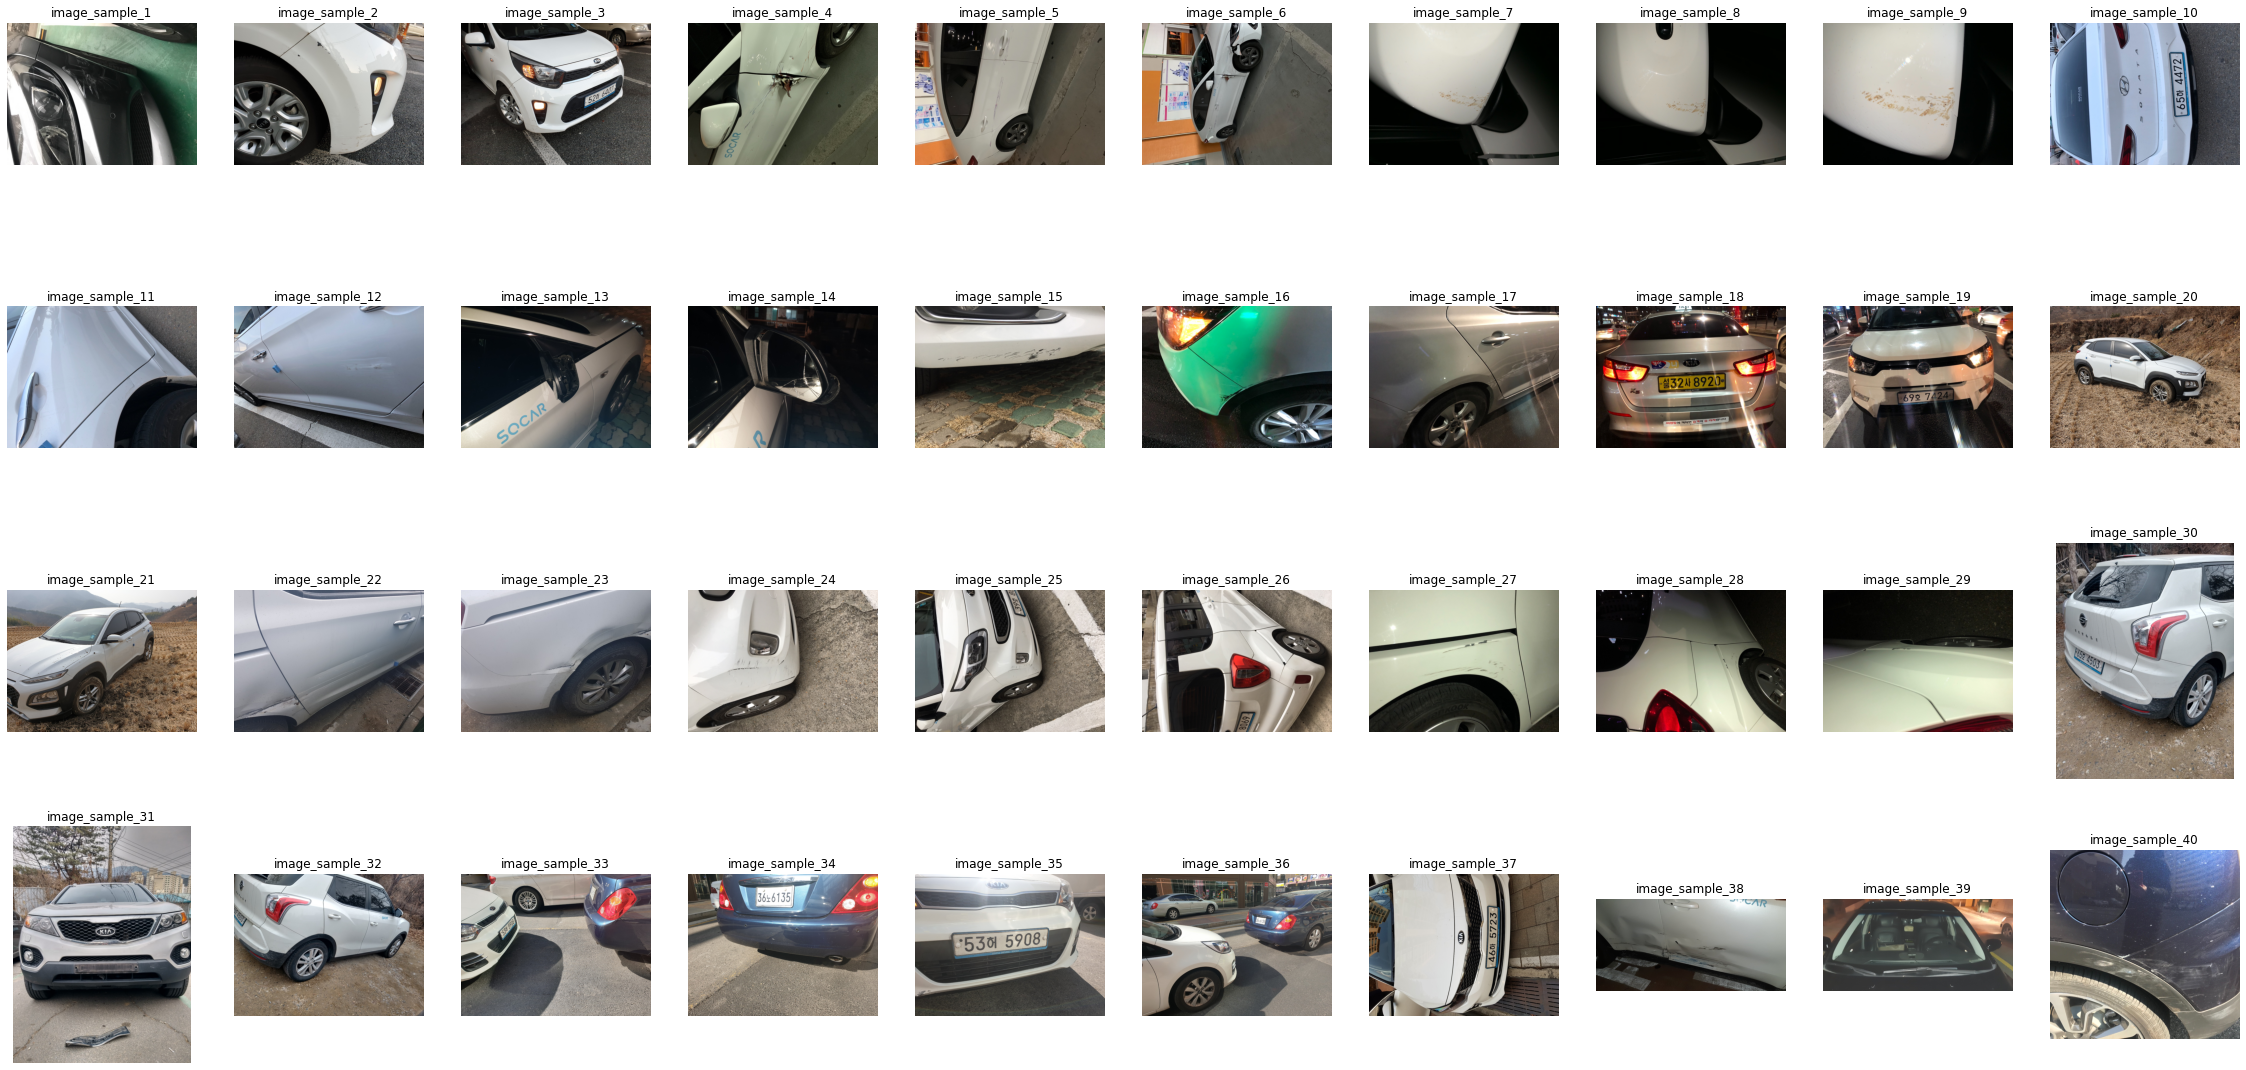

In [ ]:
fig = plt.figure(figsize=(40, 20))
columns = 10
rows = 4

target = spacing_train_loc

for i in range(1, columns*rows +1):  # 샘플 10개 이미지만 골라서

    filename = os.listdir(target)[i]
    filepath = os.path.join(target, filename) # 파일 이름으로 읽고
    img = cv2.imread(filepath)[:,:,::-1] # 이미지로 읽은 후에 -> RGB 채널을 순서를 변경해주고

    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.title(f'image_sample_{i}')
    plt.imshow(img)# 이미지를 plotting 합니다
plt.show()

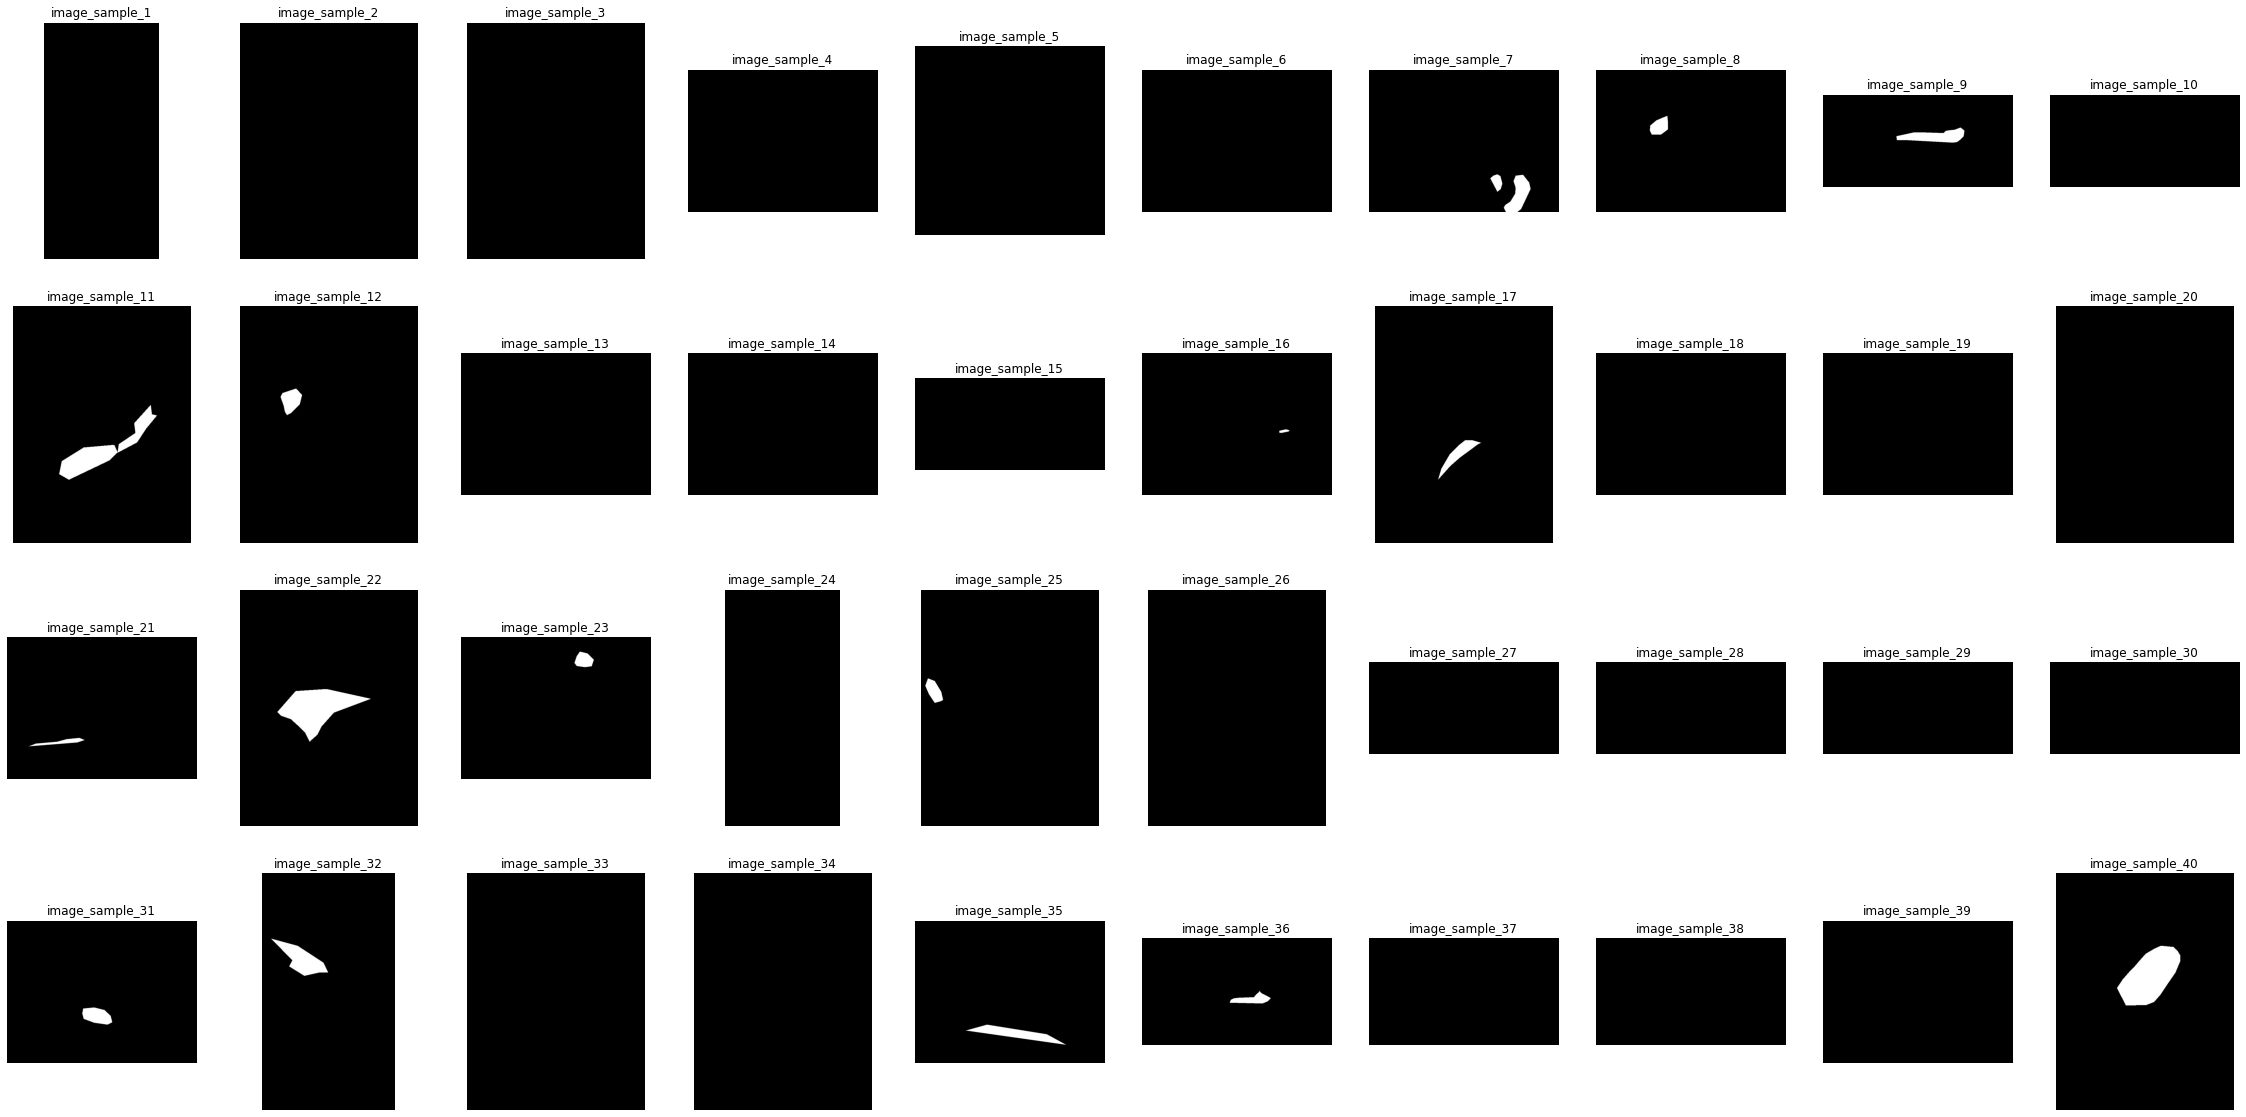

In [ ]:
fig = plt.figure(figsize=(40, 20))
columns = 10
rows = 4

masking_sample_path = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/dent/train/masks'
for i in range(1, columns*rows +1):  # 샘플 10개 이미지만 골라서

    filename = os.listdir(masking_sample_path)[i]
    filepath = os.path.join(masking_sample_path, filename) # 파일 이름으로 읽고
    img = cv2.imread(filepath)[:,:,::-1] # 이미지로 읽은 후에 -> RGB 채널을 순서를 변경해주고

    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.title(f'image_sample_{i}')
    plt.imshow(img)# 이미지를 plotting 합니다
plt.show()

이미지들마다 크기가 모두 다르다.

이미 이미지에 augmentation(rotate, crop) 되어있음 

차체가 똑바로 찍히지 않은 사진들도 많다. - sample 32~36은 바퀴가 나오지 않게 찍힘




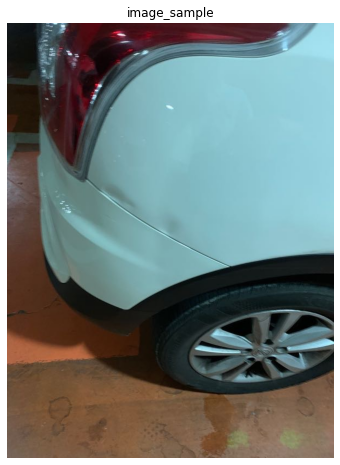

In [ ]:
# 오리지날 이미지 불러오기.

# dent_train_loc : train dent data folder loc

#불러올 이미지 인덱스
sample_num = 77

fig = plt.figure(figsize=(10, 8))
filename_orig = os.listdir(dent_train_loc)[sample_num] #해당 폴더 내 1번째 사진 불러오기
filepath_orig = os.path.join(dent_train_loc, filename_orig) # 파일 이름으로 읽고
img = cv2.imread(filepath_orig)[:,:,::-1] # 이미지로 읽은 후에 -> RGB 채널을 순서를 변경해주고
plt.axis('off')
plt.title('image_sample')
plt.imshow(img)# 이미지를 plotting 합니다
plt.show()

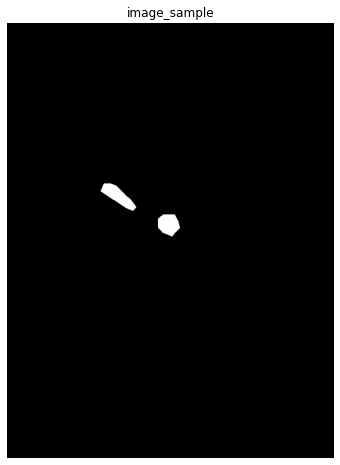

'/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/dent/train/masks/20190420_7667_22111474_0c21b6d4f6c0647a6872de3f8ec5dc3d.jpg'

In [ ]:
# 마스킹 이미지 불러오기

masking_sample_path = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/dent/train/masks'
 # masking_sample_path : train dent masking data folder loc




fig = plt.figure(figsize=(10, 8))
filename_mask = os.listdir(masking_sample_path)[sample_num] #해당 폴더 내 sample_num번째 사진 불러오기
filepath_mask = os.path.join(masking_sample_path, filename_mask) # 파일 이름으로 읽고
img = cv2.imread(filepath_mask)[:,:,::-1] # 이미지로 읽은 후에 -> RGB 채널을 순서를 변경해주고
plt.axis('off')
plt.title('image_sample')
plt.imshow(img)# 이미지를 plotting 합니다
plt.show()

filepath_mask


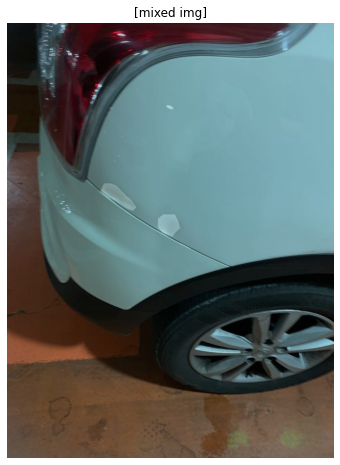

In [ ]:
#두 사진 합치기

img_orig = cv2.imread(filepath_orig) 
img_mask = cv2.imread(filepath_mask) 


mix_img = cv2.addWeighted(img_orig, 0.85, img_mask, 0.15, 0)

fig = plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(mix_img, cv2.COLOR_BGR2RGB))

plt.axis("off")
plt.title("[mixed img]")
plt.show()

In [ ]:
# 양품/불량품 가려내는 함수 있으면 좋을듯

#sudo code
# 1. 이제 각 파일( dent_train_img , dent_train_mask )에서 순서대로 하나씩 불러온 뒤에,각기 변수에 할당
# 2. add.weighted로 합치기
# 3. 합친 이미지 다른 넘파이 리스트에 저장 
# 4. 해당 사진들 저장해 폴더로 만들기(https://supermemi.tistory.com/132#:~:text=NumPy%20%EB%B0%B0%EC%97%B4%EC%9D%84%20PIL%20Image,%EB%A5%BC%20%ED%86%B5%ED%95%B4%20%EC%A0%80%EC%9E%A5%ED%95%98%EB%A9%B4%20%EB%90%9C%EB%8B%A4.)

In [ ]:
import random

# 여기서부터 함수!!!

## show_image()
대상 폴더에서 랜덤으로 40장의 사진 추출하는 함수

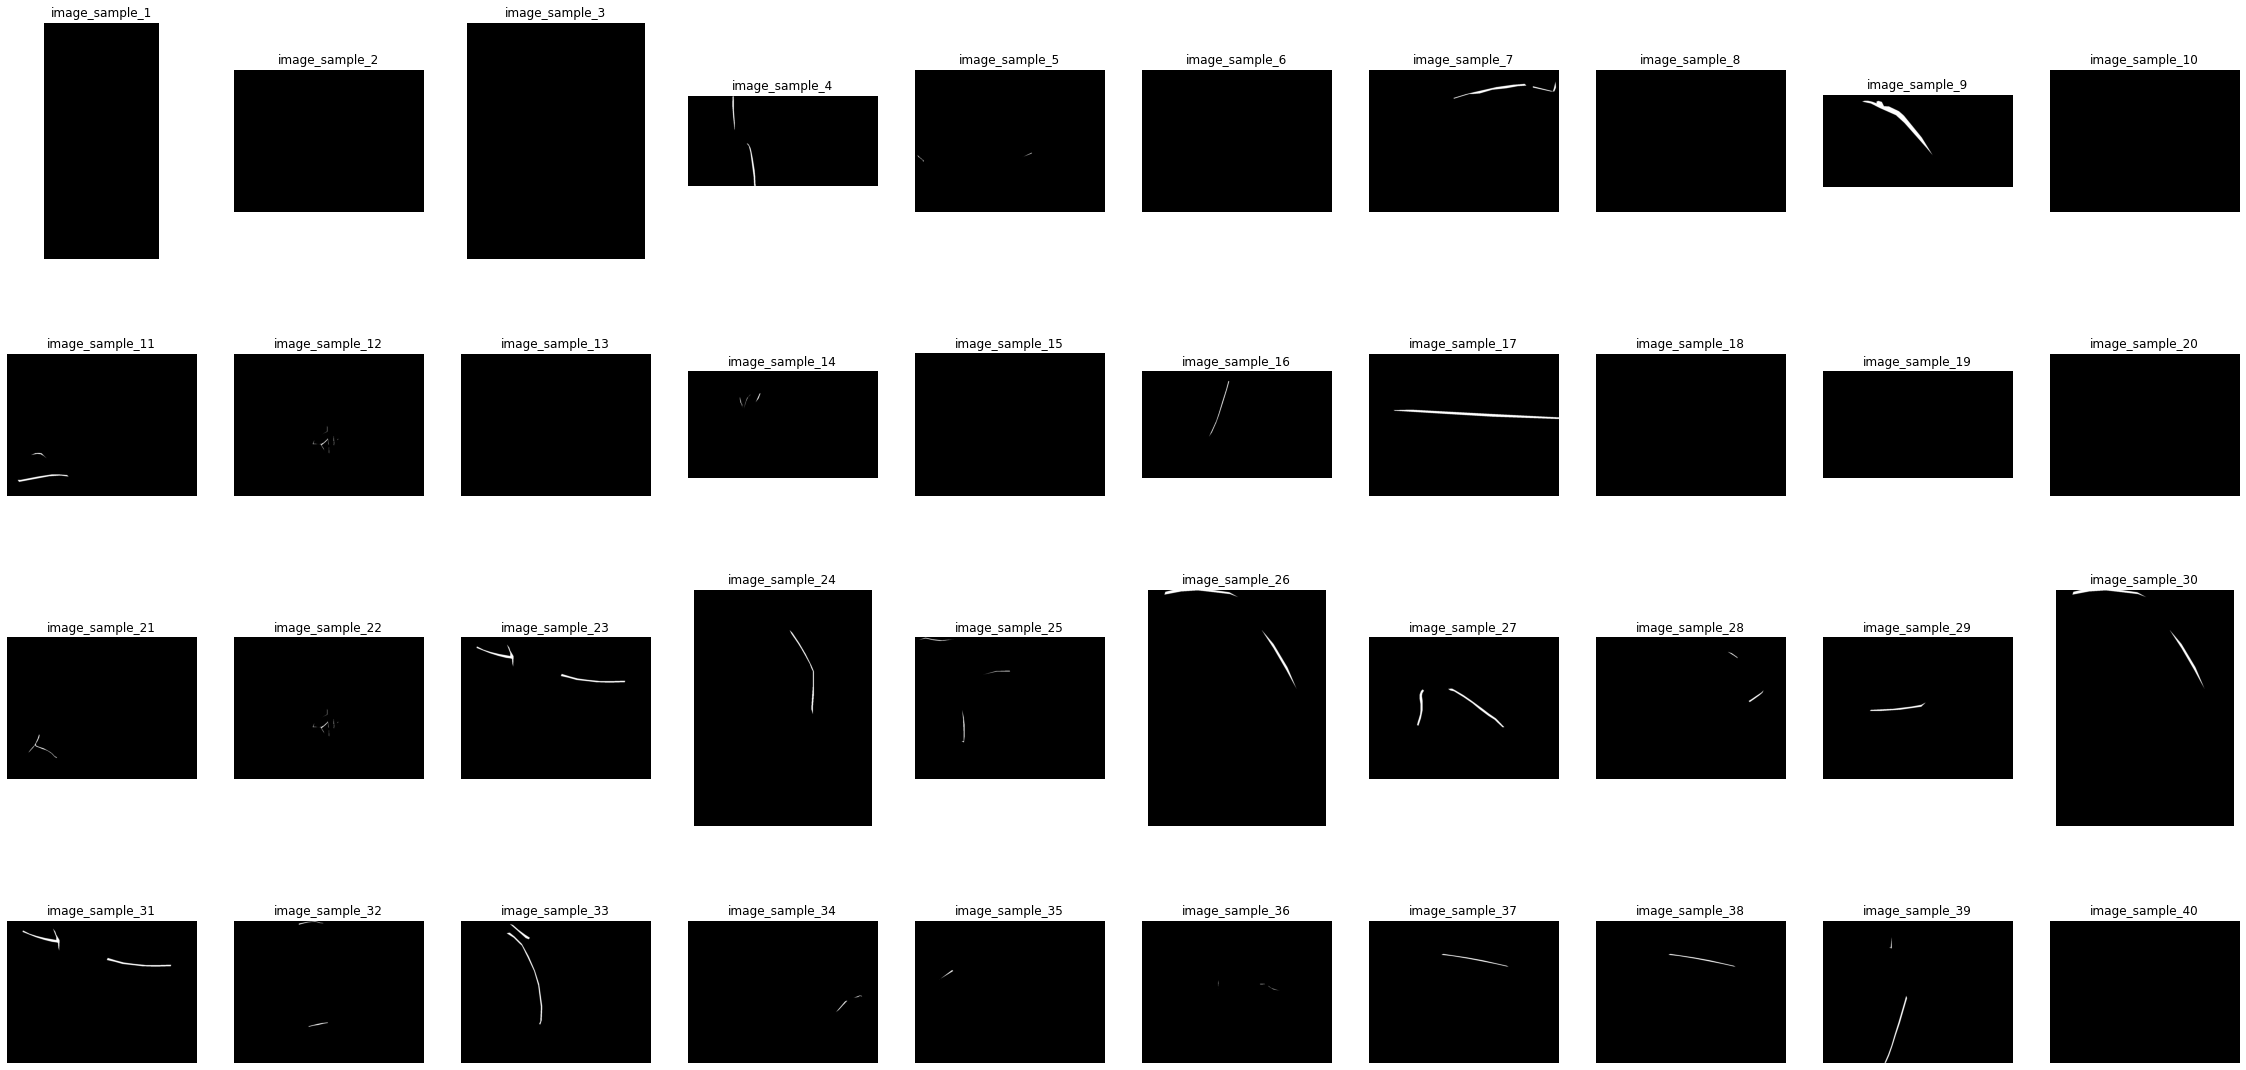

In [ ]:
home_dir = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1'
dmg_dir = 'spacing' # spacing, scratch
learn_dir = 'test' # train, valid, test
type_dir = 'masks' # or masks

def show_image(home_dir, dmg_dir, learn_dir, type_dir):
    fig = plt.figure(figsize=(40, 20))
    columns = 10
    rows = 4

    dir_name = os.path.join(home_dir, dmg_dir, learn_dir, type_dir)

    for i in range(1, columns*rows +1):  # 샘플 10개 이미지만 골라서
        # random index
        file_len = len(os.listdir(dir_name))
        random_index = random.randint(0, file_len-1)

        # read and show images
        filename = os.listdir(dir_name)[random_index]
        filepath = os.path.join(dir_name, filename) # 파일 이름으로 읽고
        img = cv2.imread(filepath)[:,:,::-1] # 이미지로 읽은 후에 -> RGB 채널을 순서를 변경해주고

        fig.add_subplot(rows, columns, i)
        plt.axis('off')
        plt.title(f'image_sample_{i}')
        plt.imshow(img)# 이미지를 plotting 합니다
    plt.show()


show_image(home_dir, dmg_dir, learn_dir, type_dir)

******

## concat_image()
### 대상폴더의 두 이미지(images,masks)를 합치고, refined_data에 저장하는 함수 

home_dir 위치에 오리지널 데이터 폴더(dent,scratch,spacing), refined_data 폴더구조만들어놔야함

(refined_data내부 구조는 오리지널과 동일) 

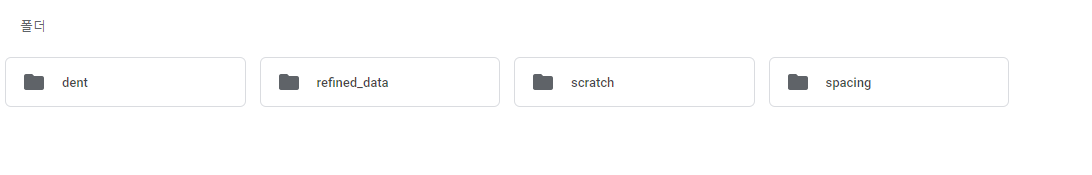

In [ ]:
#######파일 총길이 바꿔서 다시 실험!!!

In [ ]:
# home_dir = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1' 
 
dmg_dir = 'dent' # spacing, scratch
learn_dir = 'train' # train, valid, test

def concat_image(home_dir, dmg_dir, learn_dir):
    # 1. file path 저장
    dir_name = os.path.join(home_dir, dmg_dir, learn_dir)
    ## images, masks
    images_dir = os.path.join(dir_name, 'defect/images')
    masks_dir = os.path.join(dir_name, 'defect/masks')
    save_folder = os.path.join(home_dir, 'refined_data', dmg_dir, learn_dir) #save_folder = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/refine_data/dent/valid'

    # file_len(파일 총 길이) 
    # file_len = 10
    file_len = len(os.listdir(images_dir)) 
    
    for file_index in range(file_len):
        # orig 파일 만들기
        filename_orig = os.listdir(images_dir)[file_index] #해당 폴더 내 file_index번째 사진 불러오기
        filepath_orig = os.path.join(images_dir, filename_orig) # 파일 이름으로 읽고
        # img_orig = cv2.imread(filepath_orig) #변수에 할당
        img_orig = cv2.imread(filepath_orig)[:,:,::-1] # 이미지로 읽은 후에 -> RGB 채널을 순서를 변경해주고
    
        # mask 파일 만들기
        filename_mask = os.listdir(masks_dir)[file_index] #해당 폴더 내 file_index번째 사진 불러오기
        filepath_mask = os.path.join(masks_dir, filename_mask) # 파일 이름으로 읽고
        # img_mask = cv2.imread(filepath_orig) #변수에 할당
        img_mask = cv2.imread(filepath_mask)[:,:,::-1] # 이미지로 읽은 후에 -> RGB 채널을 순서를 변경해주고


        #experiment
        # print(f"image filename: {filename_orig}, mask filename: {filename_mask}", '\n')

        # concat two image
        mix_img = cv2.addWeighted(img_orig, 0.8, img_mask, 0.2, 0)
        img = Image.fromarray(mix_img) # NumPy array to PIL image
        img.save(save_folder + f'/refined_{file_index}.jpg','JPEG') # save PIL image
        


# concat_image(home_dir, dmg_dir, learn_dir)

In [ ]:
home_dir = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean'

concat_image(home_dir, 'dent', 'train')


KeyboardInterrupt: ignored

In [ ]:
home_dir = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1' 
dmg_dir_list = ['dent','scratch', 'spacing']
learn_dir_list = ['train', 'valid', 'test']

# 다 합치기
# for dmg in dmg_dir_list:
#     for learn in learn_dir_list:
#         concat_image(home_dir, dmg, learn)



for learn in learn_dir:
    concat_image(home_dir, 'spacing', learn)



#rgb값의 표준편차/평균 https://velog.io/@gcoh5589/0.485-0.456-0.406

## split_save() : 양품,불량품 나눠서 파일에 저장!!

In [ ]:
home_dir = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean'
dmg_dir = 'dent' # spacing, scratch
learn_dir = 'valid' # train, valid, test
type_dir = 'images' # or masks

#sudo
# 이미지 마스킹 보고 양품/ 불량품 구분해서 따로 저장하는 함수
# 용어 양품 - 마스킹 이미지 전부 검은색인 사진 / 불량품 - 마스킹 이미지에 라벨링값 有

#####################################
#dir에 패스 줘야할듯

def split_save(home_dir, dmg_dir, learn_dir):

    # 원본 데이터 파일 경로 할당
    dir_name_img = os.path.join(home_dir, 'original',dmg_dir, learn_dir, 'images') # 이미지 폴더 파일경로 할당
    dir_name_mask = os.path.join(home_dir, 'original',dmg_dir, learn_dir, 'masks') # 마스크 폴더 파일경로 할당

    # 파일 길이 저장
    file_len = len(os.listdir(dir_name_img)) # 대상 폴더 길이 할당 - 둘다 똑같음

    # 저장경로
    dir_fair_img_save = os.path.join(home_dir, 'fair', dmg_dir, learn_dir, 'images') # 양품 이미지 저장할 경로 할당
    dir_fair_mask_save = os.path.join(home_dir, 'fair', dmg_dir, learn_dir, 'masks') # 양품 마스크 저장할 경로 할당

    dir_defect_img_save = os.path.join(home_dir, 'defect', dmg_dir, learn_dir, 'images') # 불량품 이미지 저장할 경로 할당
    dir_defect_mask_save = os.path.join(home_dir, 'defect', dmg_dir, learn_dir, 'masks') # 불량품 마스크 저장할 경로 할당
    
    ## 이미지를 불러와 [양품, 불량품]을 분류함
    for file_index in range(0,file_len): #파일 전체 길이 대상

        #원본 이미지 파일에서 각각 사진 한장씩 할당
        filename_img = os.listdir(dir_name_img)[file_index] # filename : 각 이미지 이름 str값
        filepath_img = os.path.join(dir_name_img, filename_img) # filepath : 각 이미지 경로 str값
        img = cv2.imread(filepath_img)[:,:,::-1] # image load and change to RGB 
        img = Image.fromarray(img) # 저장할수 있는 형식으로 변환

        #원본 마스크 파일에서 각각 사진 한장씩 할당
        filename_mask = os.listdir(dir_name_mask)[file_index] # filename : 각 마스크 이름 str값
        filepath_mask = os.path.join(dir_name_mask, filename_mask) # filepath : 각 마스크 경로 str값
        mask = cv2.imread(filepath_mask)[:,:,::-1] # image load and change to RGB 
        
        is_all_zero = np.all((mask == 0)) # 이미지픽셀값이 전부 0인지 확인(다 까만색 = 마스킹 없음 = 양품 판정)
        
        mask = Image.fromarray(mask) # 저장할수 있는 형식으로 변환

        if is_all_zero:
        # 양품으로 분류
            # print(dir_fair_img_save + f'/{filename_img}')
            img.save(dir_fair_img_save + f'/{filename_img}','JPEG') #양품 이미지폴더에 사진 저장
            mask.save(dir_fair_mask_save + f'/{filename_mask}','JPEG') #양품 마스크 폴더에 사진 저장
        
        else:
        # 불량품으로 분류
            # print(dir_fair_img_save + f'/{filename_img}')
            img.save(dir_defect_img_save + f'/{filename_img}','JPEG') # 불량품 이미지 폴더 안에 사진 저장 
            mask.save(dir_defect_mask_save + f'/{filename_mask}','JPEG') # 불량품 마스크 폴더 안에 사진 저장 
    
      

# def split_save(dir):
# 양품 리스트 = []
# 불량품 리스트 = []
# dir패스설정
# 
# for num in 대상폴더 
#  	if num의 모든 픽셀값 == 0 : 
#  		양품dir에 해당 사진(넘파이어레이?) append
#  	else:
# 		불량품dir에 해당사진(넘파이어레이?)append
# 양품리스트 양품 폴더안에 save
# 불량품리스트 불량품 폴더안에 save


## 근철님의 요청: RGB 값의 평균 & 표준편차
# https://velog.io/@gcoh5589/0.485-0.456-0.406

In [ ]:
# #noise_clean defect, fair 저장 위치 파일 초기화
# # home_dir = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1' 
# dmg_dir_list = ['dent','scratch', 'spacing']
# learn_dir_list = ['train', 'valid', 'test']

# for dmg_dir in dmg_dir_list:
#     for learn_dir in learn_dir_list:

#         #전체 fair 이미지, 마스크 지우기(ex : dent > train > image / mask etc)
#         image_save_path = f'/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/fair/{dmg_dir}/{learn_dir}/images'
#         mask_save_path = f'/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/fair/{dmg_dir}/{learn_dir}/masks'
        
#         #전체 defect 안의 이미지 및 마스크 지우기
#         image_defect_save_path = f'/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/defect/{dmg_dir}/{learn_dir}/images'
#         mask_defect_save_path = f'/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/defect/{dmg_dir}/{learn_dir}/masks'
        
#         # # fair 안의 이미지 및 마스크 지우기
#         # image_fair_save_path = f'/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/{dmg_dir}/{learn_dir}/fair/images'
#         # mask_fair_save_path = f'/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/{dmg_dir}/{learn_dir}/fair/masks'




        
#         #initialize fair file
#         for file in os.scandir(image_save_path):
#             if file.name.endswith('.jpg'):
#                 os.remove(file.path)
#             else:
#                 pass

#         for file in os.scandir(mask_save_path):
#             if file.name.endswith('.jpg'):
#                 os.remove(file.path)
#             else:
#                 pass

#         #initialize defect file
#         for file in os.scandir(image_defect_save_path):
#             if file.name.endswith('.jpg'):
#                 os.remove(file.path)
#             else:
#                 pass
#         for file in os.scandir(mask_defect_save_path):
#             if file.name.endswith('.jpg'):
#                 os.remove(file.path)
#             else:
#                 pass

#         # #initialize fair file
#         # for file in os.scandir(image_fair_save_path):
#         #     os.remove(file.path)
#         # for file in os.scandir(mask_fair_save_path):
#         #     os.remove(file.path)    



In [ ]:
# 함수 실행
home_dir = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean' 
dmg_dir_list = ['dent','scratch', 'spacing']
learn_dir_list = ['train', 'valid', 'test']


for dmg in dmg_dir_list:
    for learn in learn_dir_list:
        split_save(home_dir, dmg, learn)
        print(f'folder {dmg}/{learn} DONE!!')

import IPython
IPython.display.Audio('/content/drive/MyDrive/Colab_Notebooks/Bright 5.mp3', autoplay=True)

/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/fair/dent/train/images/20190419_6247_22080352_73cf384cf0290d722f5122c150eff073.jpg
/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/fair/dent/train/images/20190419_6251_22071736_710bf424a81ec80764d557172fbdf078.jpg
/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/fair/dent/train/images/20190419_6280_22092125_c9a6624afdf875ef5dab9e9cc03ef9ff.jpg
/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/fair/dent/train/images/20190419_6280_22092126_7f74ea6c12685f2622195f6c4357cff5.jpg
/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/fair/dent/train/images/20190419_6526_22085819_83f77df353acf402147f100bde5e6ade.jpg
/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/fair/dent/train/images/20190419_6715_22079957_0f07fa3c1f1c39229a3696a47920f222.jpg
/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/fair/dent/train/images/20190419_6733_220

KeyboardInterrupt: ignored

In [ ]:
# 갯수세기
# len(os.listdir('/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/fair/spacing/test/masks'))

# for k in ['original', 'fair','defect']:

print('[original dataset]', '\n')


for dmg_dir in ['dent','scratch', 'spacing']:
    for learn_dir in ['train', 'valid', 'test']:    
        for i in ['images', 'masks']:
            print(f'accida_segmentation_dataset_v1/{dmg_dir}/{learn_dir}/{i}', ':', len(os.listdir(f'/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/{dmg_dir}/{learn_dir}/{i}')))

print('\n', '[noise_clean dataset]', '\n')

for k in ['original', 'fair','defect']:
    for dmg_dir in ['dent','scratch', 'spacing']:
        for learn_dir in ['train', 'valid', 'test']:    
            for i in ['images', 'masks']:
                print(f'noise_clean/{k}/{dmg_dir}/{learn_dir}/{i}', ':', len(os.listdir(f'/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/{k}/{dmg_dir}/{learn_dir}/{i}')))



import IPython
IPython.display.Audio('/content/drive/MyDrive/Colab_Notebooks/Bright 5.mp3', autoplay=True)

[original dataset] 

accida_segmentation_dataset_v1/dent/train/images : 2130
accida_segmentation_dataset_v1/dent/train/masks : 2130
accida_segmentation_dataset_v1/dent/valid/images : 267
accida_segmentation_dataset_v1/dent/valid/masks : 267
accida_segmentation_dataset_v1/dent/test/images : 267
accida_segmentation_dataset_v1/dent/test/masks : 267
accida_segmentation_dataset_v1/scratch/train/images : 2130
accida_segmentation_dataset_v1/scratch/train/masks : 2130
accida_segmentation_dataset_v1/scratch/valid/images : 267
accida_segmentation_dataset_v1/scratch/valid/masks : 267
accida_segmentation_dataset_v1/scratch/test/images : 267
accida_segmentation_dataset_v1/scratch/test/masks : 267
accida_segmentation_dataset_v1/spacing/train/images : 1211
accida_segmentation_dataset_v1/spacing/train/masks : 1211
accida_segmentation_dataset_v1/spacing/valid/images : 152
accida_segmentation_dataset_v1/spacing/valid/masks : 152
accida_segmentation_dataset_v1/spacing/test/images : 153
accida_segmentatio

In [ ]:
def count(dir):
  len_dir = len(os.listdir(dir))
  return len_dir
#   print('number of photos in the folder :', len_dir)


# 노이즈 판단하는 내용 추가 0, 255만 있어야하는데, 다른게 있는지 확인

## imbalance 확인 - 함수화 시켜놓자/ 실험 자동화

In [ ]:
#dent train
fair_image_cnt = count('/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/dent/train/fair/images')
defect_image_cnt = count('/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/dent/train/defect/images')
print('fair image in dent train:', fair_image_cnt,'\n','defect image in dent train :',defect_image_cnt)

fair image in dent train: 1563 
 defect image in dent train : 567


In [ ]:
#dent valid
fair_image_cnt = count('/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/dent/valid/fair/images')
defect_image_cnt = count('/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/dent/valid/defect/images')
print('fair image in dent train:', fair_image_cnt,'\n','defect image in dent train :',defect_image_cnt)

fair image in dent train: 194 
 defect image in dent train : 73


In [ ]:
#dent test
fair_image_cnt = count('/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/dent/test/fair/images')
defect_image_cnt = count('/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/dent/test/defect/images')
print('fair image in dent train:', fair_image_cnt,'\n','defect image in dent train :',defect_image_cnt)

fair image in dent train: 188 
 defect image in dent train : 79


In [ ]:
#scratch train
fair_image_cnt = count('/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/scratch/train/fair/images')
defect_image_cnt = count('/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/scratch/train/defect/images')
print('fair image in scratch train:', fair_image_cnt,'\n','defect image in scratch train :',defect_image_cnt)

fair image in scratch train: 566 
 defect image in scratch train : 1564


In [ ]:
#scratch valid
fair_image_cnt = count('/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/scratch/valid/fair/images')
defect_image_cnt = count('/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/scratch/valid/defect/images')
print('fair image in scratch valid:', fair_image_cnt,'\n','defect image in scratch vaild :',defect_image_cnt)


fair image in scratch valid: 74 
 defect image in scratch vaild : 193


In [ ]:
#scratch test
fair_image_cnt = count('/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/scratch/test/fair/images')
defect_image_cnt = count('/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/scratch/test/defect/images')
print('fair image in scratch test:', fair_image_cnt,'\n','defect image in scratch test :',defect_image_cnt)

fair image in scratch test: 70 
 defect image in scratch test : 197


In [ ]:
#spacing train
fair_image_cnt = count('/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/spacing/train/fair/images')
defect_image_cnt = count('/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/spacing/train/defect/images')
print('fair image in spacing train:', fair_image_cnt,'\n','defect image in spacing train :',defect_image_cnt)

fair image in spacing train: 549 
 defect image in spacing train : 662


In [ ]:
#spacing valid
fair_image_cnt = count('/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/spacing/valid/fair/images')
defect_image_cnt = count('/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/spacing/valid/defect/images')
print('fair image in spacing valid:', fair_image_cnt,'\n','defect image in spacing valid :',defect_image_cnt)

fair image in spacing valid: 70 
 defect image in spacing valid : 82


In [ ]:
#spacing test
fair_image_cnt = count('/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/spacing/test/fair/images')
defect_image_cnt = count('/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/spacing/test/defect/images')
print('fair image in spacing test:', fair_image_cnt,'\n','defect image in spacing test :',defect_image_cnt)

fair image in spacing test: 68 
 defect image in spacing test : 85


에러난 부분
spacing train 280번째 사진 보기`

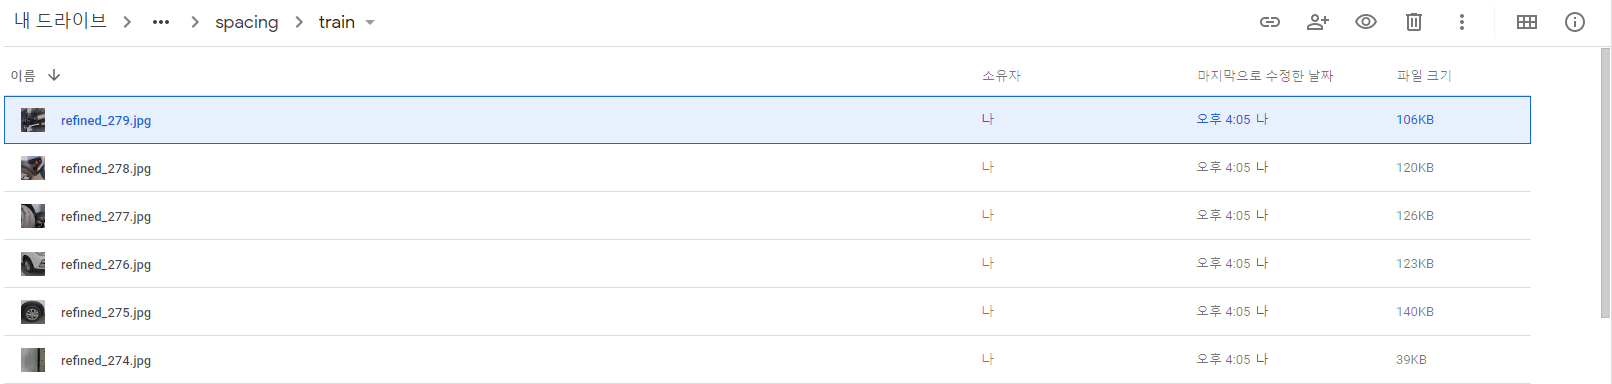

In [ ]:
noise_img_dir_list = []
noise_mask_dir_list = []

# for dmg_dir in dmg_dir:
#   for learn_dir in learn_dir:
#     check_show_noise(home_dir, dmg_dir, learn_dir)

def check_show_noise(home_dir, dmg_dir, learn_dir):
    global noise_img_dir_list, noise_mask_dir_list
  	# 원본 데이터 파일 경로 할당
    dir_name_img = os.path.join(home_dir, dmg_dir, learn_dir, 'defect/images') # 이미지 폴더 파일경로 할당
    dir_name_mask = os.path.join(home_dir, dmg_dir, learn_dir, 'defect/masks') # 마스크 폴더 파일경로 할당

    # 파일 길이 저장
    file_len = len(os.listdir(dir_name_img)) # 대상 폴더 길이 할당 - 둘다 똑같음
    
    for file_index in range(0,file_len): #파일 전체 길이 대상    
        #원본 이미지 파일에서 각각 사진 한장씩 할당
        filename_img = os.listdir(dir_name_img)[file_index] # filename : 각 이미지 이름 str값
        filepath_img = os.path.join(dir_name_img, filename_img) # filepath : 각 이미지 경로 str값
        img = cv2.imread(filepath_img)[:,:,::-1] # image load and change to RGB 

        #원본 마스크 파일에서 각각 사진 한장씩 할당
        filename_mask = os.listdir(dir_name_mask)[file_index] # filename : 각 마스크 이름 str값
        filepath_mask = os.path.join(dir_name_mask, filename_mask) # filepath : 각 마스크 경로 str값
        mask = cv2.imread(filepath_mask)[:,:,::-1] # image load and change to RGB 
        
        is_normal = np.in1d(mask, [0, 255])
        is_normal = np.all(is_normal)
        # is_normal = is_normal.all()

        
        if is_normal == True: #노이즈 없음 
          pass
        else: #0,255 이외 다른 픽셀 있으면
          noise_img_dir_list.append(filepath_img)
          noise_mask_dir_list.append(filepath_mask)

In [ ]:
home_dir = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1' 
dmg_dir = 'dent'
learn_dir = 'train'

check_show_noise(home_dir, dmg_dir, learn_dir)

In [ ]:
len(noise_img_dir_list)

567

In [ ]:
len(noise_mask_dir_list)

567

### 사진 하나 불러와서 실험해보자
코드가 잘못됐나 / 아니면 정상적인 마스킹 데이터에도 0,255 이외에 다른 픽셀값이 있는가? 

[  0   1   2   3   4   5   6   7 247 248 249 250 251 252 253 254 255] 

 [     0 307629 307623 307611 310017 329376 488532 336411 505089 341265
 338844 353433 331659 326859 322020 324429 322023]


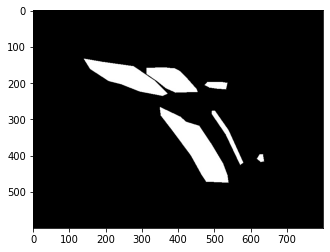

In [ ]:
from collections import Counter
path = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/scratch/train/masks/20190220_13943_20159896_5df9f6d20a31ca36693e3dcaf647765d.jpg'


mask = cv2.imread(path) # image load and change to RGB 

mask

is_normal = np.in1d(mask, [0, 255])
is_normal
# is_normal = np.all(is_normal)

u, indices = np.unique(mask, return_index=True)
# Counter(is_normal)

print(u, '\n\n' ,indices)
plt.imshow(mask)

[  0 255] 

 [     0 322020]


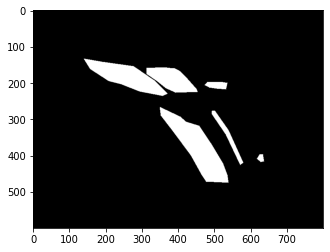

In [ ]:
mask = np.where(mask <= 127, 0, 255)
u, indices = np.unique(mask, return_index=True)
print(u, '\n\n' ,indices)
# img = cv2.imread(mask)
plt.imshow(mask)

In [ ]:
#noise_cleansing함수: mask의 픽셀값을 0또는 255로 변환하는 함수
home_dir = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1' 
dmg_dir_list = ['dent','scratch', 'spacing']
learn_dir_list = ['train', 'valid', 'test']

# 대상 파일 - '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1/dmg_dir/learn_dir/'
# 새 데이터 저장위치 -  '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/dmg_dir/learn_dir/'


# noise_del 파일에 새로 저장 - 구조는 동일하게
## 이미지 불러오기
## np.where(이미지 픽셀값이 127 이하면, 0으로, 그렇지 않다면(=127이상이면), 255로)
#### mask = np.where(mask <= 127, 0, 255)

# np.where Examples
# a = np.arange(10)
# a
# output: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
# np.where(a < 5, a, 10*a)
# output: array([ 0,  1,  2,  3,  4, 50, 60, 70, 80, 90])

## 이미지 저장하기(경로 지정)
## 

# 노이즈 제거 함수

In [ ]:
def refine_mask(home_dir, dmg_dir, learn_dir):
    dir_name_img = os.path.join(home_dir, dmg_dir, learn_dir, 'images') # 이미지 폴더 파일경로 할당
    dir_name_mask = os.path.join(home_dir, dmg_dir, learn_dir, 'masks') # 마스크 폴더 파일경로 할당


    # 파일 길이 저장
    file_len = len(os.listdir(dir_name_mask)) # 마스크 폴더의 파일 갯수 할당

    for file_index in range(0,file_len): #파일 전체 길이 대상    
        #원본 이미지 파일에서 각각 사진 한장씩 할당
        filename_img = os.listdir(dir_name_img)[file_index] # filename : 각 이미지 이름 str값
        filepath_img = os.path.join(dir_name_img, filename_img) # filepath : 각 이미지 경로 str값
        img = cv2.imread(filepath_img)[:,:,::-1] # image load and change to RGB 

        #원본 마스크 파일에서 각각 사진 한장씩 할당
        filename_mask = os.listdir(dir_name_mask)[file_index] # filename : 각 마스크 이름 str값
        filepath_mask = os.path.join(dir_name_mask, filename_mask) # filepath : 각 마스크 경로 str값
        mask = cv2.imread(filepath_mask)[:,:,::-1] 

        #마스크에 노이즈 있는지 확인
        is_normal = np.in1d(mask, [0, 255]) # mask안에 원소가 0 또는 255인지 T/F 값으로 변환 
        is_normal = np.all(is_normal) # 변환된 T/F 어레이 안의 모든 원소값이 True이면(모든 원소가 0 또는 255만 있음) is_normal = True / 한개라도 False면(노이즈 존재시) is_normal = False

        #노이즈 있는 경우, 127 중앙값 기준으로 0, 255로 변환해 노이즈 제거 / 0값만 0, 나머지는 다 255
        if is_normal == True:
            pass
        else:
        # change pixel value
            mask = np.where(mask <= 127, 0, 255)
        #어레이를 pil 이미지 형태로 저장
        img = Image.fromarray(img.astype(np.uint8)) # type를 바꿔줘야함 - unsigned int
        mask = Image.fromarray(mask.astype(np.uint8))

        # save image
        img.save(f'/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/{dmg_dir}/{learn_dir}/images/{filename_img}', 'JPEG')
        mask.save(f'/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/{dmg_dir}/{learn_dir}/masks/{filename_mask}', 'JPEG') # "아에 만든 새로운 파일 경로 + filename_mask"
    print(f'folder {dmg_dir}/{learn_dir} DONE!!')


In [ ]:
for dmg_dir in dmg_dir_list:
    for learn_dir in learn_dir_list:
        for i in ['images', 'masks']:
            print(f'noise_clean/{dmg_dir}/{learn_dir}/{i}', ':', len(os.listdir(f'/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/{dmg_dir}/{learn_dir}/{i}')))

for dmg_dir in dmg_dir_list:
    for learn_dir in learn_dir_list:
        for k in ['fair','defect']:
            for i in ['images', 'masks']:
                print(f'noise_clean/{dmg_dir}/{learn_dir}/{k}/{i}', ':', len(os.listdir(f'/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/{dmg_dir}/{learn_dir}/{k}/{i}')))

In [ ]:
# check if everyfiles are empty
len(os.listdir('/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/spacing/test/fair/masks'))
len(os.listdir('/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/spacing/test/defect/masks'))


for dmg_dir in dmg_dir_list:
    for learn_dir in learn_dir_list:
        for i in ['images', 'masks']:
            print(f'/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/{dmg_dir}/{learn_dir}/{i}', ':', len(os.listdir(f'/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/{dmg_dir}/{learn_dir}/{i}')))

for dmg_dir in dmg_dir_list:
    for learn_dir in learn_dir_list:
        for k in ['fair','defect']:
            for i in ['images', 'masks']:
                print(f'/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/{dmg_dir}/{learn_dir}/{k}/{i}', ':', len(os.listdir(f'/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/{dmg_dir}/{learn_dir}/{k}/{i}')))

/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/dent/train/images : 0
/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/dent/train/masks : 0
/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/dent/valid/images : 0
/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/dent/valid/masks : 0
/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/dent/test/images : 0
/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/dent/test/masks : 0
/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/scratch/train/images : 0
/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/scratch/train/masks : 0
/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/scratch/valid/images : 0
/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/scratch/valid/masks : 0
/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/scratch/test/images : 0
/content/drive/MyDrive/Co

In [ ]:
# noise_clean함수 적용
home_dir = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/accida_segmentation_dataset_v1' 
dmg_dir_list = ['dent','scratch', 'spacing']
learn_dir_list = ['train', 'valid', 'test']

for dmg_dir in dmg_dir_list:
    for learn_dir in learn_dir_list:
        refine_mask(home_dir, dmg_dir, learn_dir)

folder dent/train DONE!!
folder dent/valid DONE!!
folder dent/test DONE!!
folder scratch/train DONE!!
folder scratch/valid DONE!!
folder scratch/test DONE!!
folder spacing/train DONE!!
folder spacing/valid DONE!!
folder spacing/test DONE!!


In [ ]:
# check if everyfiles are empty
len(os.listdir('/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/spacing/test/fair/masks'))
len(os.listdir('/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/spacing/test/defect/masks'))


for dmg_dir in dmg_dir_list:
    for learn_dir in learn_dir_list:
        for i in ['images', 'masks']:
            print(f'noise_clean/{dmg_dir}/{learn_dir}/{i}', ':', len(os.listdir(f'/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/{dmg_dir}/{learn_dir}/{i}')))

for dmg_dir in dmg_dir_list:
    for learn_dir in learn_dir_list:
        for k in ['fair','defect']:
            for i in ['images', 'masks']:
                print(f'noise_clean/{dmg_dir}/{learn_dir}/{k}/{i}', ':', len(os.listdir(f'/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean/{dmg_dir}/{learn_dir}/{k}/{i}')))

In [ ]:
#noise_clean -> noise_clean_defect_all

In [ ]:
home_dir = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean_255' #성능 좋은 걸로다가 하기
dmg_dir = 'dent'
learn_dir = 'train'
fair_ratio = 0


import os 
import shutil
from random import random

# 정상, 불량 차량 이미지를 비율을 정해 분류하여 데이터셋을 반환하는 함수

# def: 분류 후 폴더를 저장하는 함수(경로, 비율)

## argument: 경로, "불량품 이미지에 대해" 원하는 정상 이미지 비율(ratio)
## 1. listdir로 경로 내 파일 리스트 각각(fair: images, masks, defect: images, masks) 불러옴
## 2. 길이를 센다. (e.g. 1의 경우 각각의 비율을 동일하게 한다.) (e.g.2. 0.2의 경우 정상 이미지 수의 20%를 가져옴)
## 3. sampling = (defect_img 길이 * ratio)
## 4. random으로 ratio만큼 뽑아서 shutil.copyfile()로 저장(경로 어떻게 할지 결정하기!)
#### 참고: https://appia.tistory.com/
#### 참고: https://anweh.tistory.com/29

def sampling_images(home_dir, dmg_dir, learn_dir, fair_ratio):

  # 1. define file_paths
  dir_fair_img = os.path.join(home_dir, dmg_dir, learn_dir, 'fair/images') 
  dir_fair_mask = os.path.join(home_dir, dmg_dir, learn_dir, 'fair/masks') 

  dir_defect_img = os.path.join(home_dir, dmg_dir, learn_dir, 'defect/images') 
  dir_defect_mask = os.path.join(home_dir, dmg_dir, learn_dir, 'defect/masks') 
    
  # 2. 길이를 센다.
  fair_img_len = len(os.listdir(dir_fair_img)) 
  defect_img_len = len(os.listdir(dir_defect_img)) 
  
  # 3. sampling ratio
  fair_sample_len = defect_img_len * fair_ratio
  
  # 4. 랜덤으로 리스트 뽑기


  
  # 5. 저장하기

# 

In [ ]:
# home_dir = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean'
# dmg_dir_list = ['dent','scratch', 'spacing']
# learn_dir_list = ['train', 'valid', 'test']

# def sampling_images(home_dir, dmg_dir, learn_dir, fair_ratio, defect_ratio):
#   # 1. define file_paths
#     dir_fair_img = os.path.join(home_dir, 'fair' ,dmg_dir, learn_dir, 'images') 
#     dir_fair_mask = os.path.join(home_dir, 'fair', dmg_dir, learn_dir, 'masks')
    
#     dir_defect_img = os.path.join(home_dir, 'defect', dmg_dir, learn_dir, 'images') 
#     dir_defect_mask = os.path.join(home_dir, 'defect', dmg_dir, learn_dir, 'masks') 
    
#   # 2. 파일명 리스트를 불러오고,  길이를 센다.
#     fair_img = os.listdir(dir_fair_img)
#     fair_img_len = len(fair_img) # 100개 있다고 가정
    
#     fair_mask = os.listdir(dir_fair_mask)
#     fair_mask_len = len(fair_mask) 
    
#     defect_img = os.listdir(defect_img)
#     defect_img_len = len(defect_img) # 50개 있다고 가정
  
#   	defect_mask = os.listdir(dir_defect_mask)
    
#   # 3. sampling ratio
#     sampling_ratio = (fair_ratio) / (fair_ratio + defect_ratio) # 1:3으로 입력 가정 -> 0.25 출력
  
#   # 4. 랜덤으로 리스트를 추출할 인덱스 뽑기
#   	if sampling_ratio >= 0.5:
#       	sampling_ratio = 0.5
#         print("Too many fair images!!", "\n", "sampling ratio is changed to 1:1")
    
#     picknumber = int(defect_img_len * sampling_ratio)  # 50개 * 0.25 = 12.5개 -> 12개
#     random_index = np.random.randint(0, fair_img_len, size = picknumber) # 0~100 사이에서 12개 출력
    

#   # 5. 인덱스로 파일들을 추출(fair만 추출하면 됨)
#     fair_img = fair_img[random_index] #file 경로 str값
#     fair_mask = fair_mask[random_index]
         
#   # https://ponyozzang.tistory.com/439
#   # https://www.delftstack.com/ko/howto/python/how-to-copy-a-file-in-python/
  
  
#   # 7. 랜덤으로 뽑은 fair 이미지, 마스크 복사한 defect에 concat????ㅇㅇㅇ
# 	## save fair images
    
#     ## save  

    

In [ ]:
home_dir = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean'
dmg_dir_list = ['dent','scratch', 'spacing']
learn_dir_list = ['train', 'valid', 'test']

def sampling_images(home_dir, dmg_dir, learn_dir, fair_ratio, defect_ratio):
  # 1. define file_paths
    dir_fair_img = os.path.join(home_dir, 'fair' ,dmg_dir, learn_dir, 'images') 
    dir_fair_mask = os.path.join(home_dir, 'fair', dmg_dir, learn_dir, 'masks')
    
    dir_defect_img = os.path.join(home_dir, 'defect', dmg_dir, learn_dir, 'images') 
    dir_defect_mask = os.path.join(home_dir, 'defect', dmg_dir, learn_dir, 'masks') 
    
  # 2. 파일명 리스트를 불러오고,  길이를 센다.
    fair_img = os.listdir(dir_fair_img)
    fair_img_len = len(fair_img) # 100개 있다고 가정
    
    fair_mask = os.listdir(dir_fair_mask)
    fair_mask_len = len(fair_mask) 
    
    defect_img = os.listdir(dir_defect_img)
    defect_img_len = len(defect_img) # 50개 있다고 가정
  
    defect_mask = os.listdir(dir_defect_mask)
    
  # 3. sampling ratio
    sampling_ratio = (fair_ratio) / (fair_ratio + defect_ratio) # 1:3으로 입력 가정 -> 0.25 출력
    dir_percent = int(sampling_ratio*100)
  
  # 4. 랜덤으로 리스트를 추출할 인덱스 뽑기
    if sampling_ratio >= 0.7:
        sampling_ratio = 0.7
        print("Too many fair images!!", "\n", "sampling ratio is changed to 1:1")
    
    picknumber = int(defect_img_len * sampling_ratio)  # 193개 * 0.5 = 96개 -> 12개 # 필요한 fair 데이터 길이
    
    if picknumber >  fair_img_len: #필요한 fair 이미지보다 존재하는 fair 이미지가 더 작은경우 처리 - 전체 fair 이미지를 이용
        print(f"fair 이미지의 수가 부족합니다. fair 이미지의 전체 갯수만큼 defect 이미지를 불러옵니다. 합쳐진 fair image 갯수 :{fair_img_len})") 
            #   이 경우, 위에서 설정한 비율 따르지 않고 전체 defect, fair 이미지셋 사용
        picknumber = fair_img_len
        
    random_index = np.random.randint(0, fair_img_len, size = picknumber) # 0~100개의 fair 이미지 내에서 12개 출력
    random_index  = random_index.tolist()

  # 5. 인덱스로 파일들을 추출(fair만 추출하면 됨)
    # fair_img = fair_img[random_index] #file 경로 str값
    fair_img = [ fair_img[x] for x in random_index] #file 경로 str값
    fair_mask = [ fair_mask[x] for x in random_index] #file 경로 str값

  
  
  # 6. 저장 경로 설정
    blended_img_path = os.path.join(f'/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean_{dir_percent}' ,dmg_dir, learn_dir, 'images')
    blended_mask_path = os.path.join(f'/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean_{dir_percent}' ,dmg_dir, learn_dir, 'masks')

    ## save defect images(100% 전체 복사)
    shutil.copytree(dir_defect_img, blended_img_path)
    shutil.copytree(dir_defect_mask, blended_mask_path)
    
		## save fair images
    for file_index in range(0, picknumber):
        shutil.copy(f'{dir_fair_img}/{fair_img[file_index]}', f'{blended_img_path}') #shutil.copy(대상파일, 저장할 폴더)
        shutil.copy(f'{dir_fair_mask}/{fair_mask[file_index]}', f'{blended_mask_path}')
        
    print(f'folder {dmg_dir}/{learn_dir} DONE!!')
  

In [ ]:
home_dir = '/content/drive/MyDrive/Colab_Notebooks/SOCA/hackerton/noise_clean'
dmg_dir_list = ['dent','scratch', 'spacing']
learn_dir_list = ['train', 'valid', 'test']
defect_ratio_list = [9,3,1]

for defect_ratio_list in defect_ratio_list:
    for dmg_dir in dmg_dir_list:
        for learn_dir in learn_dir_list:
            sampling_images(home_dir, dmg_dir, learn_dir,  1, defect_ratio_list)

folder dent/train DONE!!
folder dent/valid DONE!!
folder dent/test DONE!!
folder scratch/train DONE!!
folder scratch/valid DONE!!
folder scratch/test DONE!!
folder spacing/train DONE!!
folder spacing/valid DONE!!
folder spacing/test DONE!!
folder dent/train DONE!!
folder dent/valid DONE!!
folder dent/test DONE!!
folder scratch/train DONE!!
folder scratch/valid DONE!!
folder scratch/test DONE!!
folder spacing/train DONE!!
folder spacing/valid DONE!!
folder spacing/test DONE!!
folder dent/train DONE!!
folder dent/valid DONE!!
folder dent/test DONE!!
fair 이미지의 수가 부족합니다. fair 이미지의 전체 갯수만큼 defect 이미지를 불러옵니다. 합쳐진 fair image 갯수 :566)
folder scratch/train DONE!!
fair 이미지의 수가 부족합니다. fair 이미지의 전체 갯수만큼 defect 이미지를 불러옵니다. 합쳐진 fair image 갯수 :74)
folder scratch/valid DONE!!
fair 이미지의 수가 부족합니다. fair 이미지의 전체 갯수만큼 defect 이미지를 불러옵니다. 합쳐진 fair image 갯수 :70)
folder scratch/test DONE!!
folder spacing/train DONE!!
folder spacing/valid DONE!!
folder spacing/test DONE!!
